<a href="https://colab.research.google.com/github/kaushikabhishek87/Tensorflow_projects/blob/main/09_NLP_tensorflow_skimlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
!git clone  https://github.com/Franck-Dernoncourt/pubmed-rct
!ls pubmed-rct


Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 30
Unpacking objects: 100% (33/33), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [3]:
!ls /content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [4]:
import pandas as pd

In [5]:
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [6]:
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]

In [7]:
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

In [8]:
### reading data
def get_lines(filename):
  """
  Reads filename & returns line as a list
  
  Args:
    filename

  Returns:
    A list of strings
  """
  with open(filename, "r") as f:
    return f.readlines()


In [9]:
train_lines = get_lines(data_dir+"train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [10]:
len(train_lines)

210040

 Possible Structure

[{"line":0,
"target":"Background",
"text":"Emotional eating is associated with overeating and the development of obesity",
"total_lines":"11"},
......]


In [11]:
def preprocess_text_with_line_numbers(filename):
  """ 
  Returns a dictionary of line data.

  Arg:
    Filenames

  Returns:
    List of Dictionaries
  """

  input_lines = get_lines(filename)

  abstract_lines = "" 
  abstract_samples = [] 
  
  # Loop through each line in target lines
  for line in input_lines:
    if line.startswith("###"):
      abstract_id = line 
      abstract_lines = ""
    elif line.isspace():
      abstract_line_split = abstract_lines.splitlines()

      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {}
        target_text_split = abstract_line.split("\t")
        line_data["target"] = target_text_split[0]
        line_data["text"] = target_text_split[1].lower()
        line_data["line_number"] = abstract_line_number
        line_data["total_lines"] = len(abstract_line_split) - 1 
        abstract_samples.append(line_data)
    
    else:
      abstract_lines+=line 

  return abstract_samples

In [12]:
%%time
train_samples = preprocess_text_with_line_numbers(data_dir+"train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir+"dev.txt")
test_samples = preprocess_text_with_line_numbers(data_dir+"test.txt")

print(len(train_samples), len(val_samples), len(test_samples))

180040 30212 30135
CPU times: user 538 ms, sys: 125 ms, total: 663 ms
Wall time: 664 ms


In [13]:
train_samples[:14]

[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
 {'line_number': 1,
  'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'total_lines': 11},
 {'line_number': 2,
  'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'total_lines': 11},
 {'line_number': 3,
  'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'total_lines': 11},
 {'line_number': 4,
  'target': 'METHODS',
  'text': 'secondary outcome measures include

In [14]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)

train_df.head(14)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [15]:
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

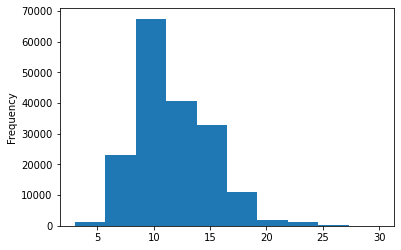

In [16]:
# Length of different lines
train_df.total_lines.plot(kind="hist")

## List of Sentences

In [17]:
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()

print(len(train_sentences), len(val_sentences), len(test_sentences))

180040 30212 30135


In [18]:
train_sentences[:5]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .']

## Make numeric labels

In [19]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1,1))

val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1,1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1,1))


## Lable encode labels

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())


In [21]:
train_labels_encoded[:8]

array([3, 2, 2, 2, 2, 2, 4, 4])

In [22]:
train_labels_one_hot[:8]

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [23]:
# Get class name & number of classes
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5, array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

## Model 0 - Navie Bayes

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("text_vectorizer", TfidfVectorizer()),
    ("navie_bayes",MultinomialNB())
])

model_0.fit(train_sentences, train_labels_encoded)

Pipeline(memory=None,
         steps=[('text_vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('navie_bayes',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [25]:
model_0.score(val_sentences, val_labels_encoded)

0.7218323844829869

In [26]:
# make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [27]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):

  """
  Calculates Models accuracy, precision, recall & return a dictionary
  """

  # accuracy  = round(accuracy_score(y_true, y_pred),2)
  # precision = round(precision_score(y_true, y_pred),2)
  # f1_score_val = round(f1_score(y_true, y_pred),2)

  model_accuracy = accuracy_score(y_true, y_pred)

  model_precision, model_recall, model_fscore , _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")

  model_results = {"accuracy": round(model_accuracy,2),
                   "precision":round(model_precision,2),
                   "recall":round(model_recall,2),
                   "f1":round(model_fscore,2)}

  return model_results

In [28]:
baseline_results = calculate_results(val_labels_encoded, baseline_preds)
baseline_results

{'accuracy': 0.72, 'f1': 0.7, 'precision': 0.72, 'recall': 0.72}

## Creating TextVectorizer

In [29]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import numpy as np

In [30]:
max_length = int(sum([len(i.split()) for i in train_sentences])/len(train_sentences))
max_length

26

In [31]:
sent_length = [len(i.split()) for i in train_sentences]
int(np.mean(sent_length))

26

(array([4.2075e+04, 8.3771e+04, 3.6877e+04, 1.0945e+04, 3.9310e+03,
        1.4450e+03, 5.6000e+02, 2.2600e+02, 1.0100e+02, 4.5000e+01,
        2.0000e+01, 1.2000e+01, 9.0000e+00, 1.0000e+01, 6.0000e+00,
        2.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1.  ,  15.75,  30.5 ,  45.25,  60.  ,  74.75,  89.5 , 104.25,
        119.  , 133.75, 148.5 , 163.25, 178.  , 192.75, 207.5 , 222.25,
        237.  , 251.75, 266.5 , 281.25, 296.  ]),
 <a list of 20 Patch objects>)

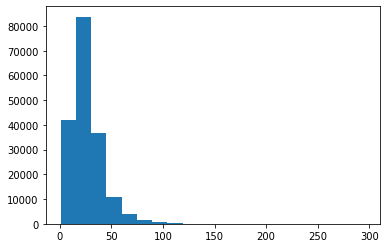

In [32]:
import matplotlib.pyplot as plt
plt.hist(sent_length, bins=20)

In [33]:
output_seq_len = int(np.percentile(sent_length,95))
output_seq_len 

55

In [34]:
max_tokens = 68000 # From paper
text_vectorizer = TextVectorization(max_tokens=max_tokens, output_sequence_length=output_seq_len )

In [35]:
text_vectorizer.adapt(train_sentences)

In [36]:
text_vectorizer([train_sentences[0]])

<tf.Tensor: shape=(1, 55), dtype=int64, numpy=
array([[   6,  331,    2,   79,    4,   53,    4,  161, 1127,  217, 2535,
           5,  557,   65, 1584,    3,  670, 5559,  636,    5,    2,  654,
        1137,    3,  180,    2,   70,  495,   36,  781,   15,   53,    5,
         350,  266,    7,  362,    6,  289,  517, 1430, 1743,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0]])>

In [37]:
rct_20k_text_vocab = len(text_vectorizer.get_vocabulary())
rct_20k_text_vocab

64841

In [38]:
text_vectorizer.get_vocabulary()[:10]

['', '[UNK]', 'the', 'and', 'of', 'in', 'to', 'with', 'a', 'were']

In [39]:
text_vectorizer.get_vocabulary()[-5:]

['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']

In [40]:
text_vectorizer.get_config()

{'dtype': 'string',
 'max_tokens': 68000,
 'name': 'text_vectorization',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'split': 'whitespace',
 'standardize': 'lower_and_strip_punctuation',
 'trainable': True,
 'vocabulary_size': 64841}

## Creating Embedding layer

In [41]:
embedding = tf.keras.layers.Embedding(input_dim=rct_20k_text_vocab, output_dim=32, mask_zero=True )

In [42]:
embedding(text_vectorizer([train_sentences[0]]))

<tf.Tensor: shape=(1, 55, 32), dtype=float32, numpy=
array([[[-0.02537941,  0.04470649, -0.03606287, ..., -0.03532254,
         -0.02188559, -0.04388276],
        [ 0.00263621, -0.02293161,  0.04027576, ..., -0.02854567,
          0.01665301,  0.0379962 ],
        [-0.03283113,  0.0481581 ,  0.02228836, ..., -0.02496262,
         -0.00472502, -0.0326358 ],
        ...,
        [ 0.02832606, -0.005858  , -0.00910975, ..., -0.04077644,
         -0.04670512,  0.0357129 ],
        [ 0.02832606, -0.005858  , -0.00910975, ..., -0.04077644,
         -0.04670512,  0.0357129 ],
        [ 0.02832606, -0.005858  , -0.00910975, ..., -0.04077644,
         -0.04670512,  0.0357129 ]]], dtype=float32)>

## Creating TF datasets to load data fast 

In [43]:
train_dataset =tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
val_dataset =tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset =tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

In [44]:
train_dataset

<TensorSliceDataset shapes: ((), (5,)), types: (tf.string, tf.float64)>

In [45]:
train_labels_one_hot.shape

(180040, 5)

In [46]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset =val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [47]:
test_dataset

<PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>

## Model 1 - Conv1D

In [48]:
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
X = text_vectorizer(inputs)
X = embedding(X)
X = tf.keras.layers.Conv1D(filters=64, kernel_size = 5, activation="relu", padding="same")(X)
X = tf.keras.layers.GlobalAveragePooling1D()(X)
outputs = tf.keras.layers.Dense(num_classes, activation="softmax")(X)

model_1 = tf.keras.models.Model(inputs, outputs, name="model_1")

In [49]:
  model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 55)                0         
_________________________________________________________________
embedding (Embedding)        (None, 55, 32)            2074912   
_________________________________________________________________
conv1d (Conv1D)              (None, 55, 64)            10304     
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 325       
Total params: 2,085,541
Trainable params: 2,085,541
Non-trainable params: 0
_________________________________________________

In [50]:
model_1.compile(loss="categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [51]:
history_model_1 = model_1.fit(train_dataset, 
                              epochs=3, 
                              steps_per_epoch = int(0.1 * len(train_dataset)),
                              validation_data = val_dataset,
                              validation_steps = int(0.1 * len(val_dataset)))

Epoch 1/3
562/562 [==============================] - 18s 30ms/step - loss: 1.0445 - accuracy: 0.5746 - val_loss: 0.7468 - val_accuracy: 0.7038
Epoch 2/3
562/562 [==============================] - 17s 30ms/step - loss: 0.7001 - accuracy: 0.7318 - val_loss: 0.6642 - val_accuracy: 0.7510
Epoch 3/3
562/562 [==============================] - 17s 30ms/step - loss: 0.6513 - accuracy: 0.7541 - val_loss: 0.6370 - val_accuracy: 0.7636


In [52]:
model_1.evaluate(val_dataset, verbose=1)

945/945 [==============================] - 3s 3ms/step - loss: 0.6380 - accuracy: 0.7668


[0.6380469799041748, 0.7668145298957825]

In [53]:
model_1_pred_probs = model_1.predict(val_dataset)
model_1_pred_probs[:5], model_1_pred_probs.shape

(array([[3.8025752e-01, 2.5245348e-01, 5.4216947e-02, 2.9031274e-01,
         2.2759350e-02],
        [4.1497287e-01, 3.7229630e-01, 5.4785302e-03, 2.0181903e-01,
         5.4332367e-03],
        [2.5217265e-01, 3.4443602e-02, 3.8224224e-03, 7.0946419e-01,
         9.7168224e-05],
        [9.1656430e-06, 5.2432137e-05, 9.8063159e-01, 3.6624482e-05,
         1.9270204e-02],
        [7.2711607e-04, 1.7955581e-02, 2.4542019e-01, 1.6149862e-03,
         7.3428214e-01]], dtype=float32), (30212, 5))

In [54]:
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 3, 2, 4, 2, 4, 2, 4, 4])>

In [55]:
model_1_results = calculate_results(val_labels_encoded, model_1_preds)
model_1_results

{'accuracy': 0.77, 'f1': 0.76, 'precision': 0.76, 'recall': 0.77}

In [56]:
baseline_results

{'accuracy': 0.72, 'f1': 0.7, 'precision': 0.72, 'recall': 0.72}

## Model 2 - Tensorflow HUB - Universal Sentence Encoder

In [57]:
import tensorflow_hub as hub

In [58]:
tf_hub_embeddings = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", 
                                   trainable=False,
                                   name = "universal_sentence_encoder")

In [59]:
tf_hub_embeddings([train_sentences[0]]), tf_hub_embeddings([train_sentences[0]]).shape

(<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
 array([[-4.90379930e-02,  5.24623767e-02,  3.95998992e-02,
         -6.31776452e-02, -7.30676949e-02,  6.28731549e-02,
          3.52798738e-02, -6.18204065e-02,  5.71083315e-02,
          4.63245027e-02,  7.16570467e-02,  2.51989812e-03,
         -9.52067878e-03,  6.51001837e-03,  3.80008891e-02,
          3.74653749e-02, -7.96469301e-02,  6.41185641e-02,
          3.50537673e-02, -3.88272963e-02,  1.50759500e-02,
         -1.20223323e-02,  1.47859799e-02, -2.70261560e-02,
          1.51410224e-02,  5.35054170e-02, -6.14337856e-03,
         -3.47358249e-02, -7.48624578e-02,  2.86212773e-03,
         -5.25581762e-02,  7.89910331e-02,  7.17563331e-02,
          1.59457475e-02, -6.31276295e-02,  1.22191105e-02,
         -1.35266446e-02, -3.82611342e-02, -1.69011746e-02,
         -6.66884333e-02, -4.18503992e-02,  7.29317293e-02,
         -1.60359144e-02, -5.26477396e-02,  6.90131262e-02,
          6.53062165e-02, -3.43542658e-02, -3.795

In [80]:
# Model
inputs = tf.keras.layers.Input(shape=[], dtype= tf.string)
X = tf_hub_embeddings(inputs)
X = tf.keras.layers.Dense(128, activation="relu")(X)
outputs = tf.keras.layers.Dense(num_classes, activation="softmax")(X)

model_2 = tf.keras.models.Model(inputs, outputs, name="model_2")

In [81]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None,)]                 0         
_________________________________________________________________
universal_sentence_encoder ( (None, 512)               256797824 
_________________________________________________________________
dense_12 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 645       
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [82]:
model_2.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [83]:
history_model_2 = model_2.fit(train_dataset, 
                              epochs=3, 
                              steps_per_epoch=int(0.1 * len(train_dataset)),
                              validation_data = val_dataset,
                              validation_steps =int(0.1 * len(val_dataset))
                              )

Epoch 1/3
562/562 [==============================] - 9s 14ms/step - loss: 0.9193 - accuracy: 0.6494 - val_loss: 0.7970 - val_accuracy: 0.6898
Epoch 2/3
562/562 [==============================] - 7s 13ms/step - loss: 0.7688 - accuracy: 0.7017 - val_loss: 0.7566 - val_accuracy: 0.7028
Epoch 3/3
562/562 [==============================] - 7s 13ms/step - loss: 0.7533 - accuracy: 0.7115 - val_loss: 0.7415 - val_accuracy: 0.7134


In [85]:
model_2_pred_probs = model_2.predict(val_dataset)
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)

In [86]:
model_2_results = calculate_results(val_labels_encoded, model_2_preds)
model_2_results

{'accuracy': 0.71, 'f1': 0.71, 'precision': 0.71, 'recall': 0.71}